# Coefficient of Determination - Lab

## Introduction
In the previous lesson, you looked at the Coefficient of Determination, what it means, and how it is calculated. In this lesson, you'll use the R-Squared formula to calculate it in Python and NumPy. 

## Objectives

You will be able to:

* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance


## Let's get started

Once a regression model is created, we need to decide how "accurate" the regression line is to some degree. 


Here is the equation for R-Squared or the Coefficient of Determination again: 

$$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1- \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $$
 
 Note that this is also equal to:

$$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}}=\dfrac{SS_{EXP}}{SS_{TOT}} $$
where

- $SS_{TOT} = \sum_i(y_i - \overline y_i)^2$ $\rightarrow$ Total Sum of Squares  
- $SS_{EXP} = \sum_i(\hat y_i - \overline y_i)^2$ $\rightarrow$  Explained Sum of Squares
- $SS_{RES}= \sum_i(y_i - \hat y_i)^2 $ $\rightarrow$ Residual Sum of Squares

Recall that the objective of $R^2$ is to learn how much of the error is a result in variation in the data features, as opposed to being a result of the regression line being a poor fit.

## Programming R-Squared

Let's calculate R-Squared in Python. We'll use these y variables:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Y = np.array([1, 3, 5, 7])
Y_pred = np.array([4.1466666666666665, 2.386666666666667, 3.56, 5.906666666666666])

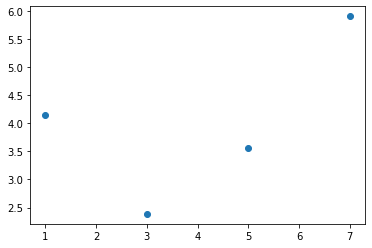

In [5]:
plt.scatter(Y, Y_pred);

* `Y` represents the actual values, i.e. $y$
* `Y_pred` represents the model's predictions, i.e. $\hat{y}$

Note that we do not actually need to have a regression equation or x values to calculate R-Squared!

We'll break down the problem of calculating R-Squared into two steps:

1. A function `sq_error` that calculates the sum of squared error between any two arrays of y values
2. A function `r_squared` that uses `sq_error` to calculate the R-Squared value

### Calculating Squared Error

The first step is to calculate the sum of squared error. Remember that the sum of squared error is the sum of the squared differences between two sets of values.

Create a function `sq_err()` that takes in y points for 2 arrays, calculates the difference between corresponding elements of these arrays, squares the differences, and sums all the squared differences.

In [11]:
# Calculate sum of squared errors between two sets of y values

def sq_err(y_1, y_2):
    diff = y_1 - y_2
    sum_squared = sum(diff**2)
    return sum_squared
sq_err(Y, Y_pred) # should return about 13.55

13.546666666666667

### Calculating R-Squared

Squared error, as calculated above is only a part of the coefficient of determination. Let's now build a function that uses the `sq_err` function above to calculate the value of R-Squared.

Remember, R-Squared is the explained sum of squares divided by the total sum of squares.

* Create a variable `y_mean` that represents the mean for each value of y
* Calculate ESS (i.e. $SS_{EXP}$) by passing `y_predicted` and `y_mean` into the `sq_err` function
* Calculate TSS (i.e. $SS_{TOT}$) by passing `y_real` and `y_mean` into the `sq_err` function
* Calculate R-Squared by dividing ESS by TSS

In [13]:
def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    y_mean = np.mean(y_real) # y_mean = np.array([y_real.mean() for y in y_real])
    ESS = sq_err(y_mean, y_predicted)
    TSS = sq_err(y_real, y_mean)
    r_squared = ESS/TSS
    return r_squared

r_squared(Y, Y_pred) # should return about 0.32

0.32266666666666655

What does this R-Squared mean?

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model that produced `Y_pred` is explaining about 32.3% of the variance in `Y`. It depends on what these values represent, whether this R-Squared is good enough for our use case.

</details>

# Your answer here
The model that produced Y_pred is explaining about 32.3% of the variance in Y. It depends on what these values represent, whether this R-Squared is good enough for our use case.

## Summary
In this lesson, you learned how to calculate R-Squared using Python and NumPy. You also interpreted the result in terms of explained variance. Later on you'll learn how to use StatsModels to compute R-Squared for you!